In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
patent_1870 = pd.DataFrame()
patent_1880 = pd.DataFrame()
patent_1890 = pd.DataFrame()

df_1870 = pd.DataFrame()
df_1880 = pd.DataFrame()
df_1890 = pd.DataFrame()


# Reorder scaped records according to decades

In [8]:

for n in range(1,7):
    
    print("============== FILE {0} ===================".format(n))
    data = np.load('DatasetPatents{0}C.npy'.format(n))
    colnames=['id','title','author','text','expir','pub','tags','city']

    df = pd.DataFrame(data, columns = colnames)
    df['tags_len'] = df.tags.apply(lambda x: len(x))
    df['year'] = df.pub[df.pub.apply(lambda x:x!='')].apply(lambda x: int(x.split('-')[0].strip()))
    df['decade'] = df.pub[df.pub.apply(lambda x:x!='')].apply(lambda x: np.floor((int(x[0:4])-1)/10)*10)
    df['city'] = df.city.apply(lambda x: x.strip())
    
    df_city = df[df.city.apply(lambda x: x!= '')]
    df_suburb = df[df.city.apply(lambda x: x== '')]
    
    print('patents published in top 100 cities: {0}%'.format(100*df_city.shape[0]/df.shape[0]))
    
    df_tag = df_city[df_city.tags_len > 0]
    print((df_suburb[df_suburb.tags_len > 0].shape[0])/(df_suburb.shape[0]))
    print('{0} % of urban patents are published with tags'.format(100*df_tag.shape[0]/df_city.shape[0]))
    
    patent_1870 = pd.concat([patent_1870, df_tag[['id','pub','tags','city','decade']][df_tag.decade == 1870]])
    patent_1880 = pd.concat([patent_1880, df_tag[['id','pub','tags','city','decade']][df_tag.decade == 1880]])
    patent_1890 = pd.concat([patent_1890, df_tag[['id','pub','tags','city','decade']][df_tag.decade == 1890]])
    
    df_1870 = pd.concat([df_1870, df[['id','pub','tags','city','decade']][df.decade == 1870]])
    df_1880 = pd.concat([df_1880, df[['id','pub','tags','city','decade']][df.decade == 1880]])
    df_1890 = pd.concat([df_1890, df[['id','pub','tags','city','decade']][df.decade == 1890]])

============== FILE 1 ===================
patents published in top 100 cities: 44.814%
0.997970499764433
100.0 % of urban patents are published with tags
============== FILE 2 ===================
patents published in top 100 cities: 47.778%
0.9961701964689211
99.99162794591653 % of urban patents are published with tags
============== FILE 3 ===================
patents published in top 100 cities: 49.604%
0.9950591316771172
99.99798403354568 % of urban patents are published with tags
============== FILE 4 ===================
patents published in top 100 cities: 47.917%
0.9937407599408636
99.99791305799612 % of urban patents are published with tags
============== FILE 5 ===================
patents published in top 100 cities: 46.475%
0.9963568425969174
100.0 % of urban patents are published with tags
============== FILE 6 ===================
patents published in top 100 cities: 43.34452444254691%
0.9976022470370625
99.96865905529438 % of urban patents are published with tags


In [10]:
df_1870.to_pickle('df_1870.pkl')
df_1880.to_pickle('df_1880.pkl')
df_1890.to_pickle('df_1890.pkl')


patent_1870.to_pickle('patent_1870.pkl')
patent_1880.to_pickle('patent_1880.pkl')
patent_1890.to_pickle('patent_1890.pkl')



# Figuring out the newest technology of each decade

in each patent, there is a list of tags, designated by patent offce. Some may bear several tags in same type, while some others have several tags in different type. by looking into the tag, we can say which technology was the biggest of that time

In [21]:
data = pd.read_pickle('patent_{0}.pkl'.format(YEAR))

df_tag_explode = data.explode('tags')
df_tag_explode.head()

,id,pub,tags,city,decade
0,US498469A,1893-05-30,"B, PERFORMING OPERATIONS; TRANSPORTING",Newark city,1890.0
0,US498469A,1893-05-30,"B21, MECHANICAL METAL-WORKING WITHOUT ESSENTIA...",Newark city,1890.0
0,US498469A,1893-05-30,"B21D, WORKING OR PROCESSING OF SHEET METAL OR ...",Newark city,1890.0
0,US498469A,1893-05-30,"B21D7/00, Bending rods, profiles, or tubes",Newark city,1890.0
0,US498469A,1893-05-30,"B21D7/06, Bending rods, profiles, or tubes in ...",Newark city,1890.0


structure of tags is: general categorizations are on top, makred with only one alphabet. By adding some numbers and alphabet, the explanation goes into detail. Here, we only save the broadest, most general tags to get the idea of general tendency 

In [22]:
df_tag_explode['category'] = df_tag_explode.tags.apply(lambda x: re.findall('^[A-Z]\S*,',x)[0].strip(',').split('/')[0][0])
df_tag_explode.head()

,id,pub,tags,city,decade,category
0,US498469A,1893-05-30,"B, PERFORMING OPERATIONS; TRANSPORTING",Newark city,1890.0,B
0,US498469A,1893-05-30,"B21, MECHANICAL METAL-WORKING WITHOUT ESSENTIA...",Newark city,1890.0,B
0,US498469A,1893-05-30,"B21D, WORKING OR PROCESSING OF SHEET METAL OR ...",Newark city,1890.0,B
0,US498469A,1893-05-30,"B21D7/00, Bending rods, profiles, or tubes",Newark city,1890.0,B
0,US498469A,1893-05-30,"B21D7/06, Bending rods, profiles, or tubes in ...",Newark city,1890.0,B


Get the definition of tag category

In [23]:
df_taginfo = df_tag_explode[['tags','category']][df_tag_explode.tags.apply(lambda x: re.findall('^[A-Z],',x) != [])]
df_taginfo = df_taginfo.drop_duplicates()
df_taginfo['def'] = df_taginfo.tags.apply(lambda x: x.split(',')[1])
df_taginfo.head()

,tags,category,def
0,"B, PERFORMING OPERATIONS; TRANSPORTING",B,PERFORMING OPERATIONS; TRANSPORTING
2,"E, FIXED CONSTRUCTIONS",E,FIXED CONSTRUCTIONS
2,"Y, GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELO...",Y,GENERAL TAGGING OF NEW TECHNOLOGICAL DEVELOPM...
3,"A, HUMAN NECESSITIES",A,HUMAN NECESSITIES
19,"F, MECHANICAL ENGINEERING; LIGHTING; HEATING; ...",F,MECHANICAL ENGINEERING; LIGHTING; HEATING; WE...



Since Y is a 'general tagging of new technology', we can guess the 'newest technology of the time' by tag distribution
Run throughout the decades, find if there is a combination between different categories of tags

YEAR 1870
 number of different fields - newtech
1    0.720186
2    0.257825
3    0.021988
Name: nb, dtype: float64
 number of different fields
1    0.815387
2    0.174082
3    0.010426
4    0.000104
Name: nb, dtype: float64
YEAR 1880
 number of different fields - newtech
2    0.503817
1    0.432332
3    0.060242
4    0.003608
Name: nb, dtype: float64
 number of different fields
1    0.553291
2    0.406484
3    0.038342
4    0.001853
5    0.000029
Name: nb, dtype: float64
YEAR 1890
 number of different fields - newtech
2    0.481623
1    0.470876
3    0.045738
4    0.001762
Name: nb, dtype: float64
 number of different fields
1    0.592360
2    0.375876
3    0.030684
4    0.001048
5    0.000032
Name: nb, dtype: float64


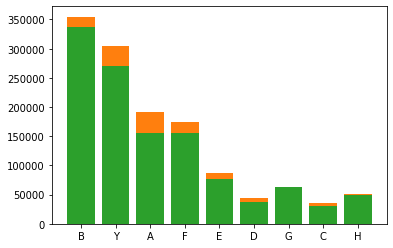

In [18]:
tags_newtech = pd.DataFrame(columns=['1870','1880','1890'])
tags_general = pd.DataFrame(columns=['1870','1880','1890'])
df_categories = pd.DataFrame()
for YEAR in ['1870','1880','1890']:
    print("YEAR {0}".format(YEAR))
    data = pd.read_pickle('patent_{0}.pkl'.format(YEAR))

    df_tag_explode = data.explode('tags')
    df_tag_explode['category'] = df_tag_explode.tags.apply(lambda x: re.findall('^[A-Z]\S*,',x)[0].strip(',').split('/')[0][0])

    df_taginfo = df_tag_explode[['tags','category']][df_tag_explode.tags.apply(lambda x: re.findall('^[A-Z],',x) != [])]
    df_taginfo = df_taginfo.drop_duplicates()
    df_taginfo['def'] = df_taginfo.tags.apply(lambda x: x.split(',')[1])
    tagdict = df_taginfo[['category','def']].set_index('category').to_dict()['def']
    plt.bar(df_tag_explode.category.value_counts().index,df_tag_explode.category.value_counts())

    df_category = pd.DataFrame(df_tag_explode[['id','pub','city','category']].drop_duplicates().\
                                       groupby(['id','pub','city'])['category'].apply(list)).reset_index()

    df_category['category'] = df_category.category.apply(lambda x: ''.join(sorted(x)))
    df_category['new_tech'] = df_category.category.apply(lambda x: 'Y' in x)
    df_category['category'] = df_category.category.apply(lambda x: x.replace('Y',''))

    df_category['nb'] = df_category.category.apply(lambda x: len(x))

    tags_newtech[YEAR] = df_category[df_category.new_tech & (df_category.nb == 1)].category.value_counts() / df_category[df_category.new_tech & (df_category.nb == 1)].shape[0]
    tags_general[YEAR] = df_category[(df_category.nb == 1)].category.value_counts() / df_category[(df_category.nb == 1)].shape[0]
    print("========= \n number of different fields - newtech")
    print(df_category[df_category.new_tech].nb.value_counts() / df_category[df_category.new_tech].shape[0])
    print("========= \n number of different fields")
    print(df_category.nb.value_counts() / df_category.shape[0])
    df_category['YEAR'] = YEAR
    df_categories = pd.concat([df_categories, df_category])
    
    
    
    df_temp = df_tag_explode[['id','pub','city','category']].drop_duplicates()

    df_metadata = df_temp[['id','pub','city']]
    df_category_variation = pd.crosstab(df_temp['id'], df_temp['category'])

    df_category_variation = df_category_variation.reset_index()
    df_category_variation = df_category_variation.merge(df_metadata)

    tags_city = df_category_variation.groupby('city').sum()

    #df.loc['Total']= df.sum()

    tags_city['city_total'] = tags_city.sum(axis=1)
    tags_city.to_pickle('tag_city_{0}.pkl'.format(YEAR))
    
    # 95% of patents are related to only one field - not really inter-domain overall

    # most patents used only one category
    # Y tag is always with some other tag
    # See which tag is most associated with Y tag (general new tech)
    #-> we will see which technology was considered cutting-edge at that time

#    plt.plot(df_category.category[df_category.new_tech & df_category.nb == 2].value_counts()/df_category.shape[0],'x')
#    plt.show()
    
    

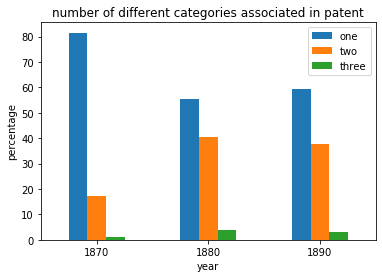

In [115]:
temp_data = {'one':[81.5387,55.3291, 59.2360], 'two':[17.4082, 40.6484, 37.5876],'three':[1.0426,3.8342, 3.0684 ]}
pd.DataFrame(temp_data,columns=['one','two','three'], index=[1870,1880,1890]).plot.bar(rot=0)
plt.title('number of different categories associated in patent')
plt.xlabel("year")
plt.ylabel("percentage")
plt.show()

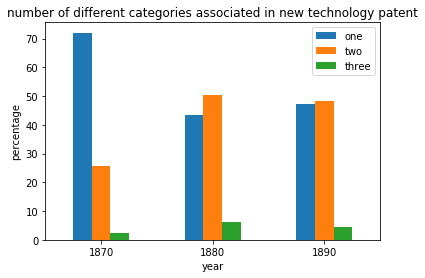

In [114]:
temp_data = {'one':[72.0186, 43.2332,  47.0876], 'two':[25.7825, 50.3817,48.1623 ],'three':[2.1988,6.0242, 4.5738]}
pd.DataFrame(temp_data,columns=['one','two','three'], index=[1870,1880,1890]).plot.bar(rot=0)
plt.title('number of different categories associated in new technology patent')
plt.xlabel("year")
plt.ylabel("percentage")
plt.show()

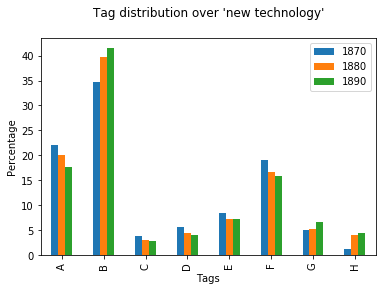

In [19]:
(tags_general.sort_index()*100).plot.bar()
plt.xlabel('Tags')
plt.ylabel('Percentage')
plt.title("Tag distribution over 'new technology'\n")
plt.show()
# B, F, A, E technologies were the cutting edges of the time 

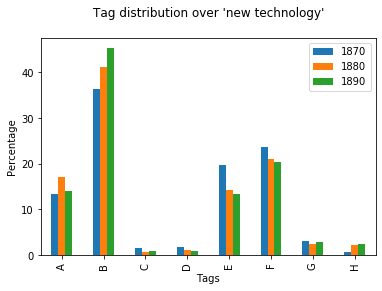

In [24]:
(tags_newtech.sort_index()*100).plot.bar()
plt.xlabel('Tags')
plt.ylabel('Percentage')
plt.title("Tag distribution over 'new technology'\n")
plt.show()
# B, F, A, E technologies were the cutting edges of the time 

# Conclusion
By analyzing the tag metadata, we can get the idea of leading - or most prospering industries of that time. We that more patents are associated with vairous categories of domain, which might imply the advancement and rising complextity of that time. 
We aimed to find out the major inventions of each domain through text cluster analysis.
One of the possible future works can be broadening the time period, and examine the evolution of different industries over time. Furthermore, we can compare the patents with Y tag and without Y tag within a same domain, and examine which of the new inventiosn are considered 'new technology', while others aren't